In [2]:
from __future__ import print_function
import pandas as pd
import numpy as np
from itertools import product
import sys,os
import time

import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append(os.path.abspath("/home/olya/SFU/Breast_cancer/DESMOND/"))

from find_optimal_parameters import parse_biclust,read_true_bics,read_all_results
from find_optimal_parameters import plot_F1_heatmap,get_opt_params, F1_per_bic

%matplotlib inline

In [3]:
# and prefix of input file name
fname_prefix = "simulated.N=10.Mu=2.0.GxP="
# suffix idication overlap type
overlap = "TT"
# where are output files
out_dir = "../simulated_datasets/results/"

# sizes of biclusters
g_sizes = [5,10,20,50,100]
s_sizes = [10,20,50,100]

# true biclusters 
true_bic_dir = "../simulated_datasets/true_biclusters/"
true_bic_fname_prefix = fname_prefix
true_bic_fname_suffix = ".overlap="+overlap+".biclusters.txt"

In [4]:
# predicted biclusters 
tool_name = "xMOTIFs"
tool_suffix = "XMotifs"
n_runs = 10

parameters = (("discr_levels",[2, 3, 5, 10, 15, 20, 30, 40, 50]),
              ("alpha",[0.001,0.01,0.05,0.10,0.15]),
              ("ns",[5,10,25,50,100]))

pred_bic_dir =  out_dir+tool_name+"/"
pred_bic_fname_prefix = fname_prefix
pred_bic_fname_suffix = ".overlap="+overlap+"."+tool_suffix+".biclust_results.txt"

img_outdir = out_dir + "/F1/img"
tsv_outdir = out_dir + "/F1/"

In [6]:
results= read_all_results(parameters,tool_name,n_runs=n_runs,
                          pred_bic_dir=pred_bic_dir,
                          pred_bic_fname_prefix=fname_prefix,
                          pred_bic_fname_suffix=pred_bic_fname_suffix,
                          true_bic_dir=true_bic_dir,
                          true_bic_fname_prefix=fname_prefix,
                          true_bic_fname_suffix=true_bic_fname_suffix)

results_outfile =  tsv_outdir+ tool_suffix+".results.tsv"
results.to_csv(results_outfile ,sep="\t")

Parameter combiations not found: 0
Successfull parameter combinations: 225
	files not found: 2634
	files empty: 0
	failed to parse: 0
Total runs 45000
Non-zero runs: 11802


In [7]:
parameters

(('discr_levels', [2, 3, 5, 10, 15, 20, 30, 40, 50]),
 ('alpha', [0.001, 0.01, 0.05, 0.1, 0.15]),
 ('ns', [5, 10, 25, 50, 100]))

Total combinations: 225
Total combinations: 225
Combinations with mean F1 > 0.05 31


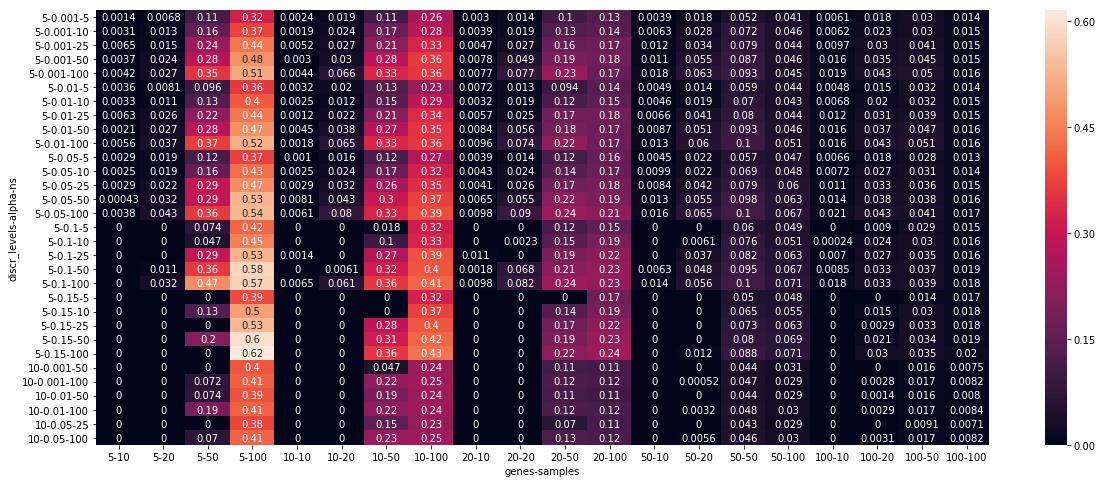

In [8]:
params = ["discr_levels","alpha","ns"]
plot_file = img_outdir+"/" + tool_name+".F1_heatmap.svg"
heatmap_outfile =  tsv_outdir+ tool_name+".F1_heatmap.tsv"

heatmap = plot_F1_heatmap(results,params,f1_thr=0.05,
                          g_sizes = [5,10,20,50,100], s_sizes = [10,20,50,100],
                          plot=True,plot_file=plot_file,outfile=heatmap_outfile)

In [9]:
parameters

(('discr_levels', [2, 3, 5, 10, 15, 20, 30, 40, 50]),
 ('alpha', [0.001, 0.01, 0.05, 0.1, 0.15]),
 ('ns', [5, 10, 25, 50, 100]))

In [10]:
default_params = (5,0.05, 10)

In [11]:

r = get_opt_params(results, params, default_params=default_params, more_n_smaples = 10)
r

33750 runs considered, 11250 runs on examples of biclusters with < 11 samples excluded

Optimal parameters (max. avg. F1 per bicluster):
	discr_levels=5;
	alpha=0.1;
	ns=100;
	Max. avg. F1 per bicluster:0.185±0.18
	avg. F1 per best match:0.165±0.172
	biclusters per run:9.6±1.7
With default parameters:
	discr_levels=5;
	alpha=0.05;
	ns=10;
	avg. F1 per bicluster:0.111±0.122
	avg. F1 per best match:0.1±0.115
	biclusters per run:10.0±0.0


F1 per bicluster                                      \
                                   mean       std count       max       min   
discr_levels alpha ns                                                         
5            0.100 100         0.185182  0.180435   150  0.657364  0.000000   
             0.050 100         0.174511  0.157986   150  0.597524  0.008000   
             0.100 50          0.165045  0.172541   150  0.627407  0.000000   
             0.010 100         0.165014  0.155531   150  0.628028  0.003077   
             0.001 100         0.162058  0.153616   150  0.640668  0.000000   
             0.050 50          0.156738  0.154549   150  0.602735  0.010795   
             0.150 50          0.145025  0.185229   150  0.636217  0.000000   
             0.100 25          0.143553  0.161138   150  0.586368  0.000000   
             0.001 50          0.143317  0.142998   150  0.565818  0.005910   
             0.010 50          0.142874  0.140952   150  0.551135  0.000000   
             0.150 100         0.141536  0.186599   150  0.643780  0.000000   
             0.050 25          0.137567  0.141882   150  0.563997  0.000000   
             0.010 25          0.125215  0.129362   150  0.514479  0.002574   
             0.001 25          0.124531  0.129674   150  0.522266  0.004142   
             0.150 25          0.119797  0.163867   150  0.575500  0.000000   
             0.050 10          0.111396  0.122492   150  0.495814  0.000000   
             0.001 10          0.101361  0.107436   150  0.436305  0.000000   
             0.150 10          0.100512  0.155846   150  0.638799  0.000000   
             0.010 10          0.098618  0.113411   150  0.474381  0.000000   
             0.100 10          0.097976  0.133801   150  0.521373  0.000000   
10           0.010 100         0.094520  0.127258   150  0.451641  0.000000   
5            0.050 5           0.093331  0.107051   150  0.484088  0.000000   
10           0.050 100         0.087830  0.123971   150  0.434288  0.000000   
             0.001 100         0.086448  0.123409   150  0.427088  0.000000   
5            0.010 5           0.084910  0.099019   150  0.461513  0.000000   
             0.100 5           0.083686  0.124400   150  0.496405  0.000000   
             0.001 5           0.083402  0.095215   150  0.433001  0.000000   
10           0.010 50          0.081099  0.119090   150  0.445247  0.000000   
             0.050 25          0.068636  0.111332   150  0.404997  0.000000   
5            0.150 5           0.067308  0.126884   150  0.504147  0.000000   
...                                 ...       ...   ...       ...       ...   
2            0.050 10          0.000000  0.000000   150  0.000000  0.000000   
             0.150 100         0.000000  0.000000   150  0.000000  0.000000   
             0.100 100         0.000000  0.000000   150  0.000000  0.000000   
                   50          0.000000  0.000000   150  0.000000  0.000000   
20           0.100 5           0.000000  0.000000   150  0.000000  0.000000   
2            0.050 25          0.000000  0.000000   150  0.000000  0.000000   
             0.100 25          0.000000  0.000000   150  0.000000  0.000000   
                   10          0.000000  0.000000   150  0.000000  0.000000   
                   5           0.000000  0.000000   150  0.000000  0.000000   
30           0.001 50          0.000000  0.000000   150  0.000000  0.000000   
             0.010 5           0.000000  0.000000   150  0.000000  0.000000   
40           0.010 10          0.000000  0.000000   150  0.000000  0.000000   
30           0.150 50          0.000000  0.000000   150  0.000000  0.000000   
40           0.010 5           0.000000  0.000000   150  0.000000  0.000000   
2            0.050 50          0.000000  0.000000   150  0.000000  0.000000   
40           0.001 50          0.000000  0.000000   150  0.000000  0.000000   
                   25          0.000000  0.000000   150  0.000000  0.0000